# Tutorial 2: TCGA Matchmaker of two ovarian tumors: recurrent vs primary

The software takes in two input gene expression files and analyzes how the gene samples relate to each other.

The goal is to check if an (input) gene profile shows similiarity with known cancer gene profiles. 

1. Load in data
2. Pre-Process data
3. Compute expression level analysis


In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr   
import matplotlib.pyplot as plt
from scipy.stats import zscore
import csv
from TCGA_code import match_computation as m


# Introduction:

The tool takes in two cancer data sets and analyzes their similarity based on their gene expression levels.
The user can choose different settings such as different methods of normalization that are applied to their input data. In this example, two pre-processed datasets are provided: A reoccuring ovarian cancer is compared to a primary ovarian tumor. The data sets are cleaned and processed again to ensure compatibility. Their similarity is assessed using simple correlation values and a bar chart that visualizes the percentage of genes with similar expression levels.



# Input data:

The final input data for this software is expected to be in the following format: 2 .csv files with two columns with the heading:

("symbol", "value")


The raw RNA-sequencing data is of type transcriptome profiling and represents gene expression quantification (expression levels). The data can be downloaded from the cancer genomics atlas (TCGA). The links for the data set are provided here:


Recurrent ovarian tumor: https://portal.gdc.cancer.gov/files/711916cd-9bc9-4ad9-8c70-127e7b2500cf 

Primary ovarian tumor: https://portal.gdc.cancer.gov/files/b709dc50-afc3-421c-912a-caf0ed4cf9fc


The data sets are expected to be of approximately 4-5 MB, including the whole human genome.

In [7]:
# 1. Load in data from input files.

file_name = "Ovary_Primary_Tumor.csv"
profile_df = m.read_expr_profile(file_name)


file_name = "Ovary_Recurrent_Tumor.csv"
TCGA_df = m.read_TCGA_sample(file_name)



# Analysis & Results  

The Analysis consists of two major parts: 

1. Processing
2. Analysis

In the processing step, the data is checked upon missing or duplicate values. Lastly, the datasets are normalized using a normalization method of choice, which include mean-, min-max- and z-score normalization. This step is incredibly important as experimentally acquired data can be differently scaled. It is important to consider relative expression values instead of absolute numbers to ensure comprehensive results.

In the analysis step, the simple ratios are taken to investigate the simalirity of gene expression values. For example, a ratio of 1 implies a perfect match, wheras a ratio < 1 implies overexpression of the reference profile and > 1 implies overexpression of the referrent sample (It is important to keep track of the samples to avoid confusion). Similar genes are defined using a ratio threshold (user-defined, default is 0.05). Finally the bar chart visualizes those ratios and provides a quick overview of how many genes are found to have similar expression ratios, or which sample is found to be over-/underexpressed.



In [3]:
# 2. Process the data - Make them be the same length by either removing missing information or adding 
#    zero expression values. These functions check both input data files both ways.

profile, sample, missing_TCGA = m.check_TCGA(profile_df, TCGA_df, add_missing = True, output = False)
profile, sample, missing_reference = m.check_profile(profile, sample, add_missing = True, output = False)


In [5]:
# 3. Normalize expression levels
profile = m.normalize_profile(profile, "mean")
sample = m.normalize_profile(sample, "mean")


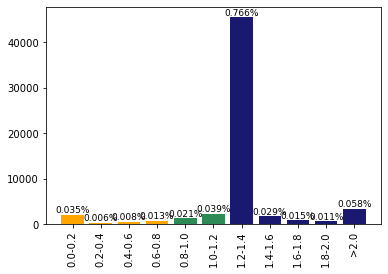

The input expression levels show a correlation value of: 0.9156
Genes that are missing in the reference profile are:
 []
Genes that are missing in the TCGA profile are:
 []


In [6]:
# 4. Data Analysis and evaluation:
gene_ratio, similiar_genes = m.expression_analysis(profile, sample)

# Bar chart Visualization
m.gene_bar_chart(gene_ratio, show = "percentage")

# Expression values correlation
distance = m.compute_distance(profile, sample)

print("The input expression levels show a correlation value of:", distance)
print("Genes that are missing in the reference profile are:\n", missing_TCGA)
print("Genes that are missing in the TCGA profile are:\n", missing_reference)


# Discussion

The input datasets are cancer samples from the same subject. As both are ovary cancer samples, it was expected to find high correlation values e.g. high similarity of the tissue samples. 
The resulting correlation value is 0.9156, and in the bar char we can see that more than 83% of all genes show similar gene expression ratios (0.6-1.4). Genes that are missing in the respective profiles are shown to be transparent for the user. In the final step, the genes that are similarly expressed (0.95-1.05, or as user-defined), are collected and exported to an external comma-separated-file. 


It was found that the software is buggy and that not all computational/analyisis steps are fully matured. Future versions will update normalization techniques and improve the statistical methods that the gene matching functionality is relying on. Lastly, the current method to output similarly expressed genes is inconvenient, and could be improved by allowing easier access and direct visualization instead of the export method that the tool is currently using.

Despite these current defects (and assuming that this dataset was particularly clean, as both samples were taken from the same subject), we can see that our initial expectations are met, and that the samples appear to be similarly expressed. The most interesing field of application now lies in those genes that are found to be very similarly expressed (within a ratio threshold as-defined). Those genes can be subject for future research, either as biomarkers or as genes of interest. Furthermore, it is planned to build a collection of different cancer samples into the software to simplify cancer sample matching across a variety of different tumors. This could be incredibly helpful in accelerating cancer research, therapeutics, and clinical applications as simliar cancers have the potential to be treated similarly as well.


In [8]:
# File Output:

path = "/Users/jenniliu/Desktop/BIOINF576/TCGA_Matchmaker/TCGA_code/example_test/Extra_Credit_Tutorial/Missing_Genes.csv"
with open(path, 'w+', newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ' ')
    text = ""
    text += "Missing Genes reference profile are:\n" #+ missing_TCGA
    for gene in missing_reference:
        text += f"\n{gene}"

    text += "\nMissing Genes TCGA profile are:\n" #+ missing_reference
    for gene in missing_TCGA:
        text += f"\n{gene}"

    my_writer.writerow(text)
    

In [9]:
path = "/Users/jenniliu/Desktop/BIOINF576/TCGA_Matchmaker/TCGA_code/example_test/Extra_Credit_Tutorial/Similiar_Genes.csv"
with open(path, 'w+', newline = '') as csvfile:
    my_writer = csv.writer(csvfile, delimiter = ' ')
    my_writer.writerow("Similiar_Genes")
    text = ""
    for gene in similiar_genes:
        idx = int(gene)
        text += f"\n{sample.iloc[idx,0]}"
    my_writer.writerow(text)


# Conclusion

The TCGA matchmaker, as introduced in this tutorial is a promising tool to get a quick "overview" of different cancer samples. It compares two cancer gene expression profiles and evaluates their similarity based on their expression levels. The biomedical application in mind is to utilize already-existing cancer research knowledge, if tumors are found to be highly similar. Furthermore, genes as biomarkers of interest can become subject of future research in therapeutics.